# Transformations

In [1]:
# add path if package not installed
import sys
sys.path.append('../src')

Start again by building the following simple planar structure

In [2]:
import numpy as np
from tnsgrt.structure import Structure

nodes = np.array([[0,0,0], [0,1,0], [2,1,0], [2,0,0]]).transpose()
members = np.array([[0,1], [1,2], [2,3], [3,0], [0,2], [1,3]]).transpose()
s0 = Structure(nodes, members, number_of_strings=4)

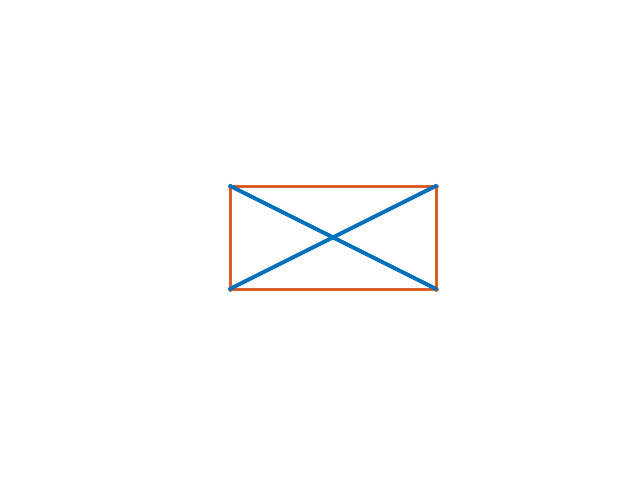

In [3]:
from matplotlib import pyplot as plt
from tnsgrt.plotter.matplotlib import MatplotlibPlotter
%matplotlib widget

plotter = MatplotlibPlotter()
plotter.plot(s0)
fig, ax = plotter.get_handles()
ax.view_init(90,-90)
ax.axis('equal')
ax.axis('off')
plt.show()

Let's also calculate forces to keep the structure in equilibrium

In [4]:
s0.equilibrium()

which results in force coefficients

In [5]:
s0.member_properties['lambda_']

0    1.0
1    1.0
2    1.0
3    1.0
4   -1.0
5   -1.0
Name: lambda_, dtype: float64

with the same magnitude in all members.

## Geometric transformations

Structures support many common geometric transformation. For example,

In [6]:
from tnsgrt import structure
s1 = structure.rotate(s0, np.pi/2*np.array([0,0,1])).translate(np.array([0,1,0]))

performs the following operations:

- copy the structure and rotate 90 degrees around the z-axis, and
- translate one unit in the direction of the y-axis

Note that geometric operations can be chained.

The transformed structure is plotted jointly with the original structure in the following figure:

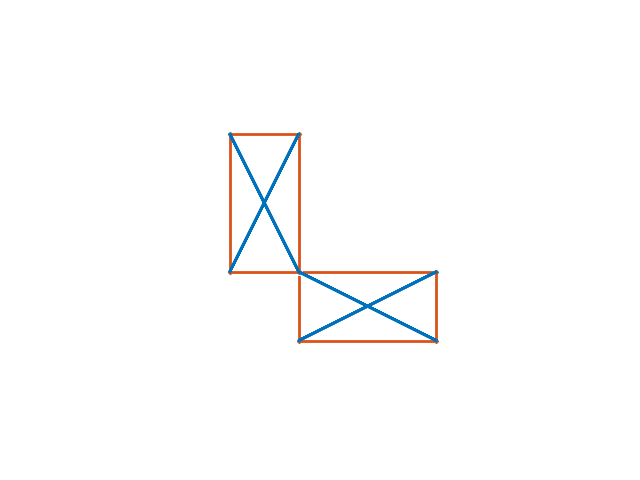

In [7]:
plotter = MatplotlibPlotter()
plotter.plot(s0, s1)
_, ax = plotter.get_handles()
ax.view_init(90,-90)
ax.axis('equal')
ax.axis('off')
plt.show()

## Merging Structures

It is also possible to merge various structure while consolidating nodes and members.

Start again by copying and translating the basic planar structure:

In [8]:
s2 = structure.translate(s0, np.array([2,0,0]))

The result is a structure that has two coincident nodes and one overlapping string. This is visualized in the next figure.

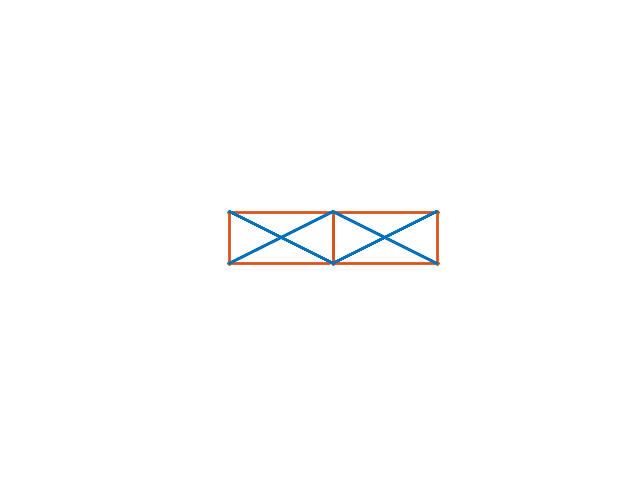

In [9]:
plotter = MatplotlibPlotter()
plotter.plot(s0, s2)
_, ax = plotter.get_handles()
ax.view_init(90,-90)
ax.axis('equal')
ax.axis('off')
plt.show()

The module function `tnsgrt.structure.merge` merges the given structures into a new one

In [10]:
from tnsgrt import structure
s3 = structure.merge(s2, s0)

The resulting structure, stored in `s3`, is a structure that is the *union* of the two given structures, with 8 nodes, 4 bars, and 8 strings. Two pairs of nodes in the structure, namely the pairs (0, 7) and (1, 6),

In [11]:
s3.nodes[:,[0, 7, 1, 6]]

array([[2., 2., 2., 2.],
       [0., 0., 1., 1.],
       [0., 0., 0., 0.]])

are located in the exact same spatial position.

After calling `tnsgrt.structure.Structure.merge_close_nodes`

In [12]:
s3.merge_close_nodes()
s3

Structure with 6 nodes, 4 bars and 8 strings

those two pairs of "close nodes" are merged into single nodes, resulting in a structure with only 6 nodes:

In [13]:
s3.nodes

array([[2., 2., 4., 4., 0., 0.],
       [0., 1., 1., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0.]])

After merging the close nodes, the structure still has 8 members, with one pair of such members, the members (0, 8), now connected to the exact same pair of nodes:

In [14]:
s3.members[:, [0, 8]]

array([[0, 1],
       [1, 0]])

Those members are still independent, each one carrying a suitable set of physical parameters, for example their equilibrium force coefficient, force, and mass:

In [15]:
s3.get_member_properties([0, 8], 'lambda_', 'force', 'mass')

,lambda_,force,mass
0,1.0,1.0,1.0
8,1.0,1.0,1.0


Next we will merge those overlapping members. But before we do that, let's first add one tag to one of the overlapping members to illustrate what happens during the member merging process.

In [16]:
s3.add_member_tag('redundant', 8)
s3.get_members_by_tag('redundant')

array([8])

The overlapping members are now joined by the method `tsnsgr.structure.Structure.merge_overlapping_members`

In [17]:
s3.merge_overlapping_members(verbose=True)

C:\Users\mauri\github\tensegrity\examples\../src\tnsgrt\structure.py:535: UserWarning: The following members will be removed: [8]
  warnings.warn('The following members will be removed: '


This operation removed the overlapping string, resulting in a structure with 6 nodes, 4 bars and 7 strings:

In [18]:
s3.members

array([[0, 1, 2, 3, 0, 1, 4, 5, 0, 4, 5],
       [1, 2, 3, 0, 2, 3, 5, 1, 4, 1, 0]])

In the new compact structure, member 0 is the one connecting nodes (0, 1)

In [19]:
s3.members

array([[0, 1, 2, 3, 0, 1, 4, 5, 0, 4, 5],
       [1, 2, 3, 0, 2, 3, 5, 1, 4, 1, 0]])

When the members were merged, their tags were also merged, so that the tag `redudant` now belongs to member 0:

In [20]:
s3.get_members_by_tag('redundant')

array([0])

Their physical parameters where also combined:

In [21]:
s3.get_member_properties(0, 'lambda_', 'force', 'mass')

lambda_    2.0
force      2.0
mass       2.0
Name: 0, dtype: object

where the other members in the structure remain the same

In [22]:
s3.get_member_properties(s2.get_members_by_tag('string'), 'lambda_', 'force', 'mass')

,lambda_,force,mass
0,2.0,2.0,2.0
1,1.0,2.0,1.0
2,1.0,1.0,1.0
3,1.0,2.0,1.0


Of course the geometry of the structure remains the same

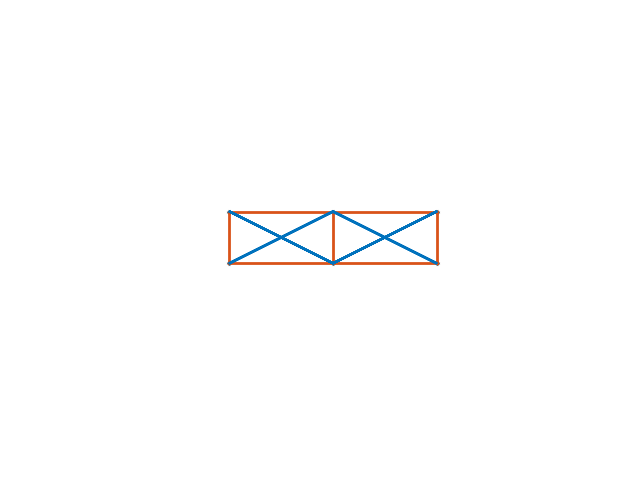

In [23]:
plotter = MatplotlibPlotter()
plotter.plot(s3)
_, ax = plotter.get_handles()
ax.view_init(90,-90)
ax.axis('equal')
ax.axis('off')
plt.show()